In [7]:
#Import modules
#SK learn
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import optimizers
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Using TensorFlow backend.


# Iris SVC KFold

In [ ]:
iris = load_iris()

In [ ]:
X = iris['data']

In [ ]:
#categorical for nn
Y = to_categorical(iris['target'])
Y2 = iris['target']

In [ ]:
kf = KFold(n_splits=10, shuffle = True)

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
for train_index, test_index in kf.split(X):
    X2_train, X2_test = X[train_index], X[test_index]
    Y2_train, Y2_test = Y2[train_index], Y2[test_index]
    clf.fit(X2_train, Y2_train)
    clfTest = clf.predict(X2_test)
    print(confusion_matrix(clfTest, Y2_test))
    print()

# Iris Neural Nets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
#Model
model = Sequential()
model.add(Dense(6, input_dim = 13, activation = 'relu'))
model.add(Dense(10, activation = 'linear'))
model.add(Dense(3, activation = 'softmax'))
opt = optimizers.SGD(learning_rate = 0.1, momentum = 0, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
my_model_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 400)

In [ ]:
plt.plot(my_model_training.history['loss'])

In [ ]:
plt.plot(my_model_training.history['loss'], label='Loss')
plt.plot(my_model_training.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
plt.plot(my_model_training.history['accuracy'], label='Accuracy')
plt.plot(my_model_training.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

In [ ]:
y_predicted = model.predict(X_test)
Y_predicted = np.argmax(y_predicted, axis = 1)

In [ ]:
y_test = np.argmax(Y_test, axis = 1)

In [ ]:
confusion_matrix(Y_predicted, y_test)

# Boston KFold Linear SVR

In [ ]:
boston = load_boston()

In [ ]:
A = boston['data']

In [ ]:
B = boston['target']

In [ ]:
clf2 = svm.SVR(kernel = 'linear')

In [ ]:
kFold = KFold(n_splits = 11, shuffle = True)

In [ ]:
for train_index, test_index in kFold.split(A):
    A_train, A_test = A[train_index], A[test_index]
    B_train, B_test = B[train_index], B[test_index]
    clf2.fit(A_train, B_train)
    print(clf2.score(A_test, B_test))
    print()

# Diabetes KFold Regression (multiplr models)

In [ ]:
diabetes = load_diabetes()

In [ ]:
C, D = diabetes['data'], diabetes['target']

In [ ]:
clf3 = svm.SVR(kernel = 'linear')
clf4 = svm.SVR(kernel = 'rbf')
reg = linear_model.Ridge(alpha=.5)
reg2 = linear_model.Lasso(alpha=0.1)

In [ ]:
k2Fold = KFold(n_splits = 17, shuffle = True)

In [ ]:
resultLinear = []
resultRBF = []
resultRidge = []
resultLasso = []

In [ ]:
def trainKFold(model):
    results = []
    for train_index, test_index in k2Fold.split(C):
        C_train, C_test = C[train_index], C[test_index]
        D_train, D_test = D[train_index], D[test_index]
        model.fit(C_train, D_train)
        results.append(model.score(C_test, D_test))
    return sorted(results)

In [ ]:
resultLinear = []
resultRBF = []
resultRidge = []
resultLasso = []
for i in range(1,11):
    currentAlpha = i/100
    reg = linear_model.Ridge(alpha=currentAlpha)
    resultRidge.append(trainKFold(reg))
    
    reg2 = linear_model.Lasso(alpha=currentAlpha)
    resultLasso.append(trainKFold(reg2))

In [ ]:
worstRidge = -1
bestRidge = -1
worstLasso = -1
bestLasso = -1

for i in range(len(resultRidge)):
    print("Ridge Worst: ", resultRidge[i][0])
    #print("Ridge Middle: ", resultRidge[i][8])
    #print("Ridge Best: ", resultRidge[i][-1])
    print("Lasso Worst: ", resultLasso[i][0])
    #print("Lasso Middle: ", resultLasso[i][8])
    #print("Lasso Best: ", resultLasso[i][-1])
    print()
    if(resultRidge[i][0] > worstRidge):
        worstRidge = resultRidge[i][0]
    if(resultRidge[i][-1] > bestRidge):
        bestRidge = resultRidge[i][-1]
    if(resultLasso[i][0] > worstLasso):
        worstLasso = resultLasso[i][0]
    if(resultLasso[i][-1] > bestLasso):
        bestLasso = resultLasso[i][-1]
    
print("Worst Ridge: ", worstRidge)
print("Worst Lasso: ", worstLasso)
print("Best Ridge: ", bestRidge)
print("Best Lasso: ", bestLasso)
    

In [ ]:
results = []
alpha = 0.06
results.append(trainKFold(clf3))
results.append(trainKFold(clf4))
reg = linear_model.Ridge(alpha=alpha)
results.append(trainKFold(reg))
reg2 = linear_model.Lasso(alpha=alpha)
results.append(trainKFold(reg2))

In [ ]:
for i in range(len(results)):
    print(results[i][0])
    print(results[i][8])
    print(results[i][-1])
    print()

In [ ]:
for i in range(10):
    C_i = C2[:,i]
    print("Feature {} has Mean {} and Standard Deviation {}".format(i,statistics.mean(C_i), statistics.stdev(C_i)))

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(C)

In [ ]:
C2 = scaler.transform(C)

In [ ]:
C2

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca.fit(C)

In [ ]:
C_5 = pca.transform(C)

In [ ]:
C_5.shape

# Breast Cancer KFold PCA Linear SVC

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
E,F = breast_cancer['data'], breast_cancer['target']

In [ ]:
E.shape

In [ ]:
linear = svm.SVC(kernel = 'linear')

In [ ]:
K3Fold = KFold(n_splits = 10, shuffle = True)

In [ ]:
results = []
for train_index, test_index in K3Fold.split(E):
    E_train, E_test = E[train_index], E[test_index]
    F_train, F_test = F[train_index], F[test_index]
    linear.fit(E_train, F_train)
    results.append(linear.score(E_test, F_test))
print(sorted(results))

In [ ]:
#pca.fit(E)

In [ ]:
E_5 = pca.fit_transform(E)

In [ ]:
results = []
for train_index, test_index in K3Fold.split(E_5):
    E_train, E_test = E[train_index], E[test_index]
    E_train, E_test = E_train[:,:3], E_test[:,:3]
    F_train, F_test = F[train_index], F[test_index]
    linear.fit(E_train, F_train)
    results.append(linear.score(E_test, F_test))
print(sorted(results))

In [ ]:
results = []
for train_index, test_index in K3Fold.split(E_5):
    E_5_train, E_5_test = E_5[train_index], E_5[test_index]
    F_train, F_test = F[train_index], F[test_index]
    linear.fit(E_5_train, F_train)
    results.append(linear.score(E_5_test, F_test))
print(sorted(results))

In [ ]:
pca2 = PCA()

In [ ]:
pca2.fit(E)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Breast Cancer Dataset Explained Variance')
plt.show()

# Iris Classification

In [4]:
iris2 = load_iris()

In [6]:
G = iris2['data']

In [9]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 100, max_iter = 300, tol = 1e-04, random_state = 0)

In [15]:
h_km = km.fit_predict(G)

In [16]:
h_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
confusion_matrix(h_km, iris2['target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

In [20]:
pca3 = PCA(2)

In [22]:
G_2 = pca3.fit_transform(G)

In [23]:
h2_km = km.fit_predict(G_2)

In [24]:
confusion_matrix(h2_km, iris2['target'])

array([[ 0,  3, 36],
       [ 0, 47, 14],
       [50,  0,  0]], dtype=int64)

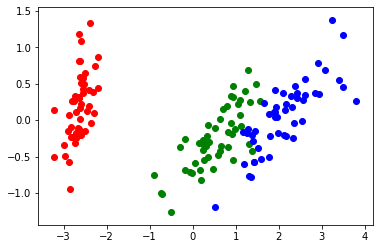

In [30]:
plt.scatter(G_2[:50,0], G_2[:50,1], c='red')
plt.scatter(G_2[50:100,0], G_2[50:100,1], c='green')
plt.scatter(G_2[100:,0], G_2[100:,1], c='blue')
plt.show()

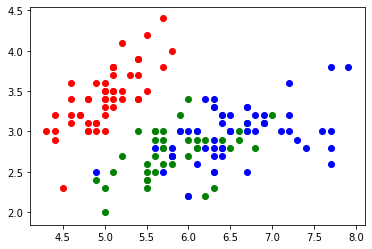

In [29]:
plt.scatter(G[:50,0], G[:50,1], c='red')
plt.scatter(G[50:100,0], G[50:100,1], c='green')
plt.scatter(G[100:,0], G[100:,1], c='blue')
plt.show()